In [2]:
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
from talib import ADX, BBANDS, DX, MACD, RSI, SAR

from framework import utils as framework_utils

pd.options.mode.chained_assignment = None

In [3]:
def process(df):
    """Process a single dataframe.
    
    Parameters
    ----------
    `df`: `pd.DataFrame`.
        Containing columns: `'close'`, `'low'`, and `'high'`.
        
    Returns
    -------
    `pd.DataFrame`
    """
    _, df["close_norm"], _ = BBANDS(df["close"])

    # normalize between 0 - 1
    df["adx_norm"] = ADX(df["high"], df["low"], df["close"]) / 100.0
    df["rsi_norm"] = RSI(df["close"]) / 100.0
    df["macd_norm"], _, _ = MACD(df["close"])
    df["macd_norm"] = df["macd_norm"] / 100.0

    # normalize between -1 - 1
    df["dmi_norm"] = DX(df["high"], df["low"], df["close"])
    df["dmi_norm"] = df["dmi_norm"] / df["dmi_norm"].abs().max()

    df["sar_norm"] = SAR(df["high"], df["low"])
    df["sar_norm"] = df["close"] - df["sar_norm"]
    df["sar_norm"] = df["sar_norm"] / df["sar_norm"].abs().max()

    df["close_norm"] = np.log(df["close"]) - np.log(df["close_norm"])
    df["close_norm"] = df["close_norm"] / df["close_norm"].abs().max()

    # only keep processed columns
    df = df.filter(
        ["adx_norm", "rsi_norm", "dmi_norm", "sar_norm", "macd_norm", "close_norm"]
    )
    return df

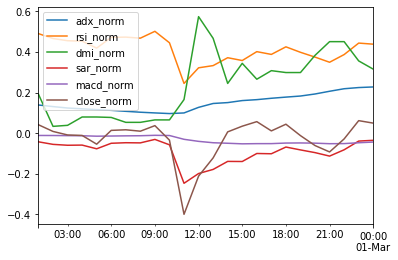

In [5]:
df = pd.read_csv("data/binance/BTC-BNB-1:00:00.csv", index_col=0)
df.index = pd.to_datetime(df.index, utc=True)
df = framework_utils.process_df(df, timedelta(hours=1), interpolate=True)
df.columns = map(str.lower, df.columns)

# process the dataframe, then plot it for visual inspection
processed_df = process(df)
processed_df.tail(24).plot()

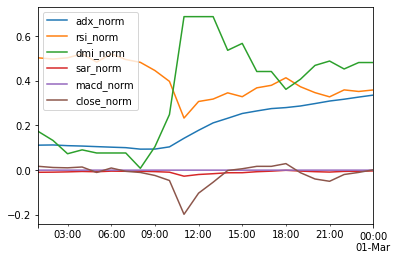

In [10]:
df2 = pd.read_csv("data/binance/XRP-BNB-1:00:00.csv", index_col=0)
df2.index = pd.to_datetime(df2.index, utc=True)
df2 = framework_utils.process_df(df2, timedelta(hours=1), interpolate=True)
df2.columns = map(str.lower, df2.columns)

# process the dataframe, then plot it for visual inspection
processed_df2 = process(df2)
processed_df2.tail(24).plot()